In [209]:
import pandas as pd
import os
import numpy as np
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [210]:
fighterfights = pd.read_csv("ufc_fighter_fight")
fighterfights.columns

Index(['fighter', 'id', 'f_event', 'f_significant_strikes_landed',
       'f_significant_strikes_attempted', 'f_knockdowns',
       'f_takedown_successful', 'f_takedown_attempted', 'f_submision_attempt',
       'f_reversals', 'f_head_landed', 'f_head_attempted', 'f_body_landed',
       'f_body_attempted', 'f_leg_landed', 'f_leg_attempted',
       'f_distance_landed', 'f_distance_attempted', 'f_clinch_landed',
       'f_clinch_attempted', 'f_ground_landed', 'f_ground_attempted',
       'f_rounds', 'f_winner', 'f_result', 'f_id', 'f_date'],
      dtype='object')

In [ ]:

#fighterfights["opponent"] = ""
for i in range(len(fighterfights)):
    for j in range(len(fighterfights)):
        if fighterfights.loc[i,"id"] == fighterfights.loc[j,"id"]:
            if fighterfights.loc[i,"fighter"] != fighterfights.loc[j,"fighter"]:
                fighterfights.loc[i,"opponent"] = fighterfights.loc[j,"fighter"]
                fighterfights.loc[i,"opponent_f_significant_strikes_landed"] = fighterfights.loc[j,"f_significant_strikes_landed"]
                fighterfights.loc[i,"opponent_f_significant_strikes_attempted"] = fighterfights.loc[j,"f_significant_strikes_attempted"]
                fighterfights.loc[i,"opponent_f_knockdowns"] = fighterfights.loc[j,"f_knockdowns"]
                fighterfights.loc[i,"opponent_f_takedown_successful"] = fighterfights.loc[j,"f_takedown_successful"]
                fighterfights.loc[i,"opponent_f_takedown_attempted"] = fighterfights.loc[j,"f_takedown_attempted"]
                fighterfights.loc[i,"opponent_f_submission_attempt"] = fighterfights.loc[j,"f_submision_attempt"]
                fighterfights.loc[i,"opponent_f_reversals"] = fighterfights.loc[j,"f_reversals"]
                fighterfights.loc[i,"opponent_f_head_landed"] = fighterfights.loc[j,"f_head_landed"]
                fighterfights.loc[i,"opponent_f_head_attempted"] = fighterfights.loc[j,"f_head_attempted"]
                fighterfights.loc[i,"opponent_f_body_landed"] = fighterfights.loc[j,"f_body_landed"]
                fighterfights.loc[i,"opponent_f_body_attempted"] = fighterfights.loc[j,"f_body_attempted"]
                fighterfights.loc[i,"opponent_f_leg_landed"] = fighterfights.loc[j,"f_leg_landed"]
                fighterfights.loc[i,"opponent_f_leg_attempted"] = fighterfights.loc[j,"f_leg_attempted"]
                fighterfights.loc[i,"opponent_f_distance_landed"] = fighterfights.loc[j,"f_distance_landed"]
                fighterfights.loc[i,"opponent_f_distance_attempted"] = fighterfights.loc[j,"f_distance_attempted"]

                fighterfights.loc[i,"opponent_f_clinch_landed"] = fighterfights.loc[j,"f_clinch_landed"]
                fighterfights.loc[i,"opponent_f_clinch_attempted"] = fighterfights.loc[j,"f_clinch_attempted"]
                fighterfights.loc[i,"opponent_f_ground_landed"] = fighterfights.loc[j,"f_ground_landed"]
                fighterfights.loc[i,"opponent_f_ground_attempted"] = fighterfights.loc[j,"f_ground_attempted"]
                print(fighterfights.loc[i,"fighter"] + " vs " + fighterfights.loc[j,"fighter"])
            
        
    
    



In [212]:
fighterfights.f_winner[fighterfights.f_winner == 'W'] = 1
fighterfights.f_winner[fighterfights.f_winner == 'L'] = 0

C:\Users\masaa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\masaa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [213]:
#https://stackoverflow.com/questions/67928643/filter-a-column-by-multiple-values
fighterfights = fighterfights[(fighterfights["f_winner"]==0) | (fighterfights["f_winner"]==1)]
fighterfights = fighterfights.dropna()


In [214]:
predictors = ['f_significant_strikes_landed', 'f_significant_strikes_attempted', 'f_knockdowns', 'f_takedown_successful', 'f_takedown_attempted', 'f_submision_attempt', 'f_reversals','f_head_landed','f_head_attempted','f_body_landed','f_body_attempted','f_leg_landed','f_leg_attempted','f_distance_landed','f_distance_attempted','f_clinch_landed','f_clinch_attempted','f_ground_landed','f_ground_attempted','opponent_f_significant_strikes_landed','opponent_f_significant_strikes_attempted','opponent_f_knockdowns','opponent_f_takedown_successful','opponent_f_takedown_attempted','opponent_f_submission_attempt','opponent_f_reversals','opponent_f_head_landed','opponent_f_head_attempted','opponent_f_body_landed','opponent_f_body_attempted','opponent_f_leg_landed','opponent_f_leg_attempted','opponent_f_distance_landed','opponent_f_distance_landed','opponent_f_clinch_landed','opponent_f_clinch_attempted','opponent_f_ground_landed','opponent_f_ground_attempted']
X = fighterfights[predictors]
Y =fighterfights["f_winner"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

zscore = StandardScaler()
zscore.fit(X_train)


StandardScaler()

In [215]:
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

In [216]:
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [217]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(Xz_train, y_train)


LogisticRegression(max_iter=1000)

C:\Users\masaa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


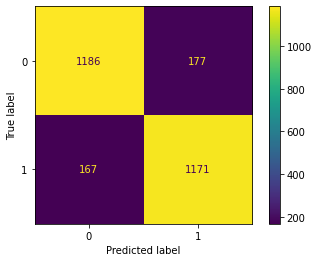

In [218]:
predvals = LogReg.predict(Xz_test)
predprobs = LogReg.predict_proba(Xz_test)

confusion_matrix(y_test, predvals)

plot_confusion_matrix(LogReg, Xz_test, y_test)

In [219]:
print(accuracy_score(y_test, predvals))
print(f1_score(y_test, predvals))

0.872639763050722
0.8719285182427401


In [220]:
predvalstrain = LogReg.predict(Xz_train)
accuracy_score(y_train, predvalstrain)



0.8797333580224054

In [224]:
coefs = pd.DataFrame({"Coefs":LogReg.coef_[0], "Names":predictors})
coefs = coefs.append({"Coefs":LogReg.intercept_[0], "Names":"intercept"}, ignore_index = True)
coefs['Coefs'] = coefs['Coefs'].astype(float)

coefs

,Coefs,Names
0,0.668567,f_significant_strikes_landed
1,-0.014181,f_significant_strikes_attempted
2,0.847439,f_knockdowns
3,0.611121,f_takedown_successful
4,-0.055984,f_takedown_attempted
5,0.635913,f_submision_attempt
6,0.177736,f_reversals
7,0.814103,f_head_landed
8,0.013801,f_head_attempted
9,0.252444,f_body_landed


In [225]:
coefs["Coef odds"] = np.exp(coefs["Coefs"])
coefs

,Coefs,Names,Coef odds
0,0.668567,f_significant_strikes_landed,1.951438
1,-0.014181,f_significant_strikes_attempted,0.985920
2,0.847439,f_knockdowns,2.333664
3,0.611121,f_takedown_successful,1.842496
4,-0.055984,f_takedown_attempted,0.945554
5,0.635913,f_submision_attempt,1.888746
6,0.177736,f_reversals,1.194511
7,0.814103,f_head_landed,2.257151
8,0.013801,f_head_attempted,1.013897
9,0.252444,f_body_landed,1.287168


C:\Users\masaa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


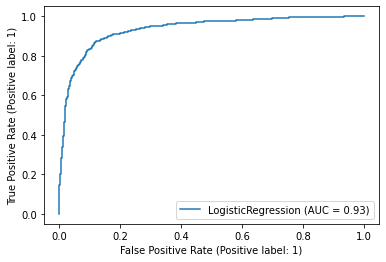

In [226]:
plot_roc_curve(LogReg, Xz_test, y_test)